## Imports

In [149]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.feature import hog
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import pickle

## Load Dataset

In [136]:
vehicles_dataset = []
non_vehicles_dataset = []

for i in range(1, 6):
    tmp = os.listdir('./vehicles/car{}'.format(i))
    for j in tmp:
        vehicles_dataset.append('./vehicles/car{}/{}'.format(i, j))
        

for i in range(1, 3):
    tmp = os.listdir('./non-vehicles/notcar{}'.format(i))
    for j in tmp:
        non_vehicles_dataset.append('./non-vehicles/notcar{}/{}'.format(i,j))

name_dataset = vehicles_dataset + non_vehicles_dataset

num_vehicles_dataset = [1 for i in range(len(vehicles_dataset))]
num_non_vehicles_dataset = [0 for i in range(len(non_vehicles_dataset))]
sum_dataset = num_vehicles_dataset + num_non_vehicles_dataset

## Basic Summary of Dataset

In [151]:
len(num_vehicles_dataset)

8792

In [152]:
len(num_non_vehicles_dataset)

8968

In [153]:
len(sum_dataset)

17760

In [154]:
vehicles_dataset[:5]

['./vehicles/car1/image0000.png',
 './vehicles/car1/image0001.png',
 './vehicles/car1/image0002.png',
 './vehicles/car1/image0003.png',
 './vehicles/car1/image0004.png']

## Visualize Some of the Data

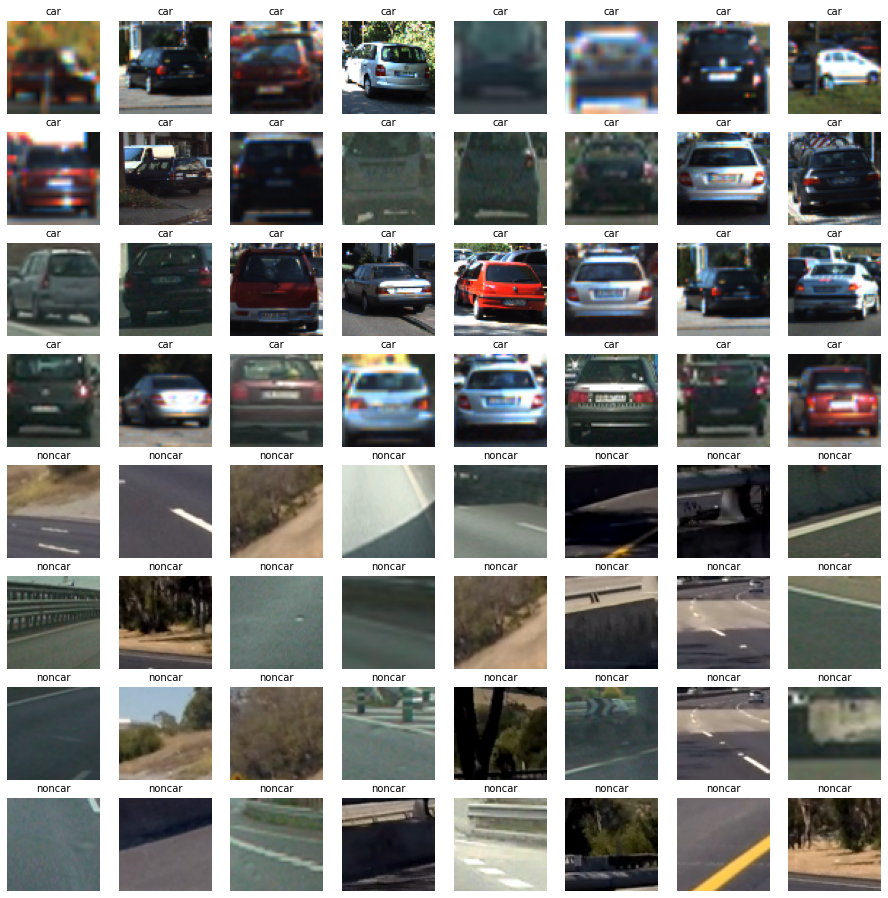

In [162]:
fig, axs = plt.subplots(8,8, figsize=(16, 16))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()

# Step through the list and search for chessboard corners
for i in np.arange(32):
    img = mpimg.imread(vehicles_dataset[np.random.randint(0,len(vehicles_dataset))])
    #img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    axs[i].axis('off')
    axs[i].set_title('car', fontsize=10)
    axs[i].imshow(img)
for i in np.arange(32,64):
    img = mpimg.imread(non_vehicles_dataset[np.random.randint(0,len(non_vehicles_dataset))])
    #img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    axs[i].axis('off')
    axs[i].set_title('noncar', fontsize=10)
    axs[i].imshow(img)

## Feature Extraction Method

In [3]:
# Raw pixel intensity : (Color and Shape)
# Histogram of pixel intensity : (Color only)
# Gradients of pixel intensity : (Shape only)

In [4]:
# Raw pixel intensity : (Color and Shape)

In [137]:
def raw_pixel_intensity(src, idx):
    src_r = cv2.resize(src, (idx,idx))
    src_r = src_r.flatten()
    
    return src_r 

In [138]:
# Histogram of pixel intensity : (Color only)

In [139]:
def histogram_of_pixel_intensity(src, size): 
    hist1 = cv2.calcHist(images=[src], channels=[0], mask=None, histSize=[size], ranges=[0, 256])
    hist2 = cv2.calcHist(images=[src], channels=[1], mask=None, histSize=[size], ranges=[0, 256])
    hist3 = cv2.calcHist(images=[src], channels=[2], mask=None, histSize=[size], ranges=[0, 256])

    hist1 = hist1.flatten()
    hist2 = hist2.flatten()
    hist3 = hist3.flatten()

    hist = np.concatenate((hist1,hist2,hist3))
    return hist

In [140]:
# Gradients of pixel intensity : (Shape only)

In [141]:
def gradients_of_pixel_intensity(src):   
    hog_feature1, hog_image1 = hog(src[:, :, 0], orientations=9, pixels_per_cell= (8,8),
        cells_per_block = (2,2),
        block_norm = 'L2-Hys', 
        transform_sqrt=False,
        visualize=True,
        feature_vector=True)

    hog_feature2, hog_image2 = hog(src[:, :, 1], orientations=9, pixels_per_cell= (8,8),
        cells_per_block = (2,2),
        block_norm = 'L2-Hys', 
        transform_sqrt=False,
        visualize=True,
        feature_vector=True)

    hog_feature3, hog_image3 = hog(src[:, :, 2], orientations=9, pixels_per_cell= (8,8),
        cells_per_block = (2,2),
        block_norm = 'L2-Hys', 
        transform_sqrt=False,
        visualize=True,
        feature_vector=True)

    hog_feature = np.concatenate((hog_feature1, hog_feature2, hog_feature3))
    
    return hog_feature

## Feature Extraction

In [142]:
orient = 9
pix_per_cell = 8
cell_per_block = 2

In [143]:
features = []
spatial = 32
hist_bins = 32

for i in vehicles_dataset:
    src = mpimg.imread(i)
    src = cv2.cvtColor(src, cv2.COLOR_RGB2YCrCb)
    raw = raw_pixel_intensity(src, spatial)
    hist = histogram_of_pixel_intensity(src, hist_bins)
    grad = gradients_of_pixel_intensity(src)        
    features.append(np.concatenate((raw, hist, grad)))

for i in non_vehicles_dataset:
    src = mpimg.imread(i)
    src = cv2.cvtColor(src, cv2.COLOR_RGB2YCrCb)
    raw = raw_pixel_intensity(src, spatial)
    hist = histogram_of_pixel_intensity(src, hist_bins)
    grad = gradients_of_pixel_intensity(src)        
    features.append(np.concatenate((raw, hist, grad)))

In [144]:
features = np.array(features)

## Data Preparation

In [145]:
scaler = StandardScaler()
X_scaler = scaler.fit_transform(features)

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X_scaler, sum_dataset)

In [84]:
X_test.shape

(250, 8460)

## Classifier

In [147]:
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9903153153153154

- 500개 정도에서의 정확도(채널별)

In [85]:
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

C:\python\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.992

- 채널별 정확도

In [99]:
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

C:\python\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.9608108108108108

- grayScale에서 grid

In [16]:
pamran_grid = [
    { 'max_iter':[10000]}
]

grid_search = GridSearchCV(clf, pamran_grid, cv=5, scoring = "accuracy", n_jobs=1)
grid_search.fit(X_train, y_train)

C:\python\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\python\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\python\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\python\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\python\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\python\lib\s

GridSearchCV(cv=5, estimator=LinearSVC(), n_jobs=1,
             param_grid=[{'C': [0.5, 1.0, 1.5], 'max_iter': [10000]}],
             scoring='accuracy')

In [17]:
grid_search.best_params_

{'C': 0.5, 'max_iter': 10000}

In [18]:
grid_search.best_score_

0.9411411411411411

## Data Saving to Pickle

In [148]:
dist_pickle = {}
dist_pickle["svc"] = clf
dist_pickle["scaler"] = scaler
dist_pickle["orient"] = orient
dist_pickle["pix_per_cell"] = pix_per_cell
dist_pickle["cell_per_block"] = cell_per_block
dist_pickle["spatial"] = spatial # => resize 조정할때
dist_pickle["hist_bins"] = hist_bins
pickle.dump(dist_pickle, open("svc_pickle.p", 'wb'))